<a href="https://colab.research.google.com/github/Paradorn657/recurrent_nearal/blob/master/common_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [0]:
def trend(time, slope=0):
    return slope * time

In [9]:
time = np.arange(4*365+1) # 4 ปี 
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [10]:
series = 10 + trend(time,0.1)
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

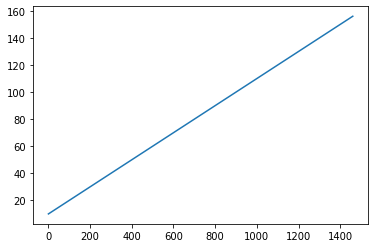

In [11]:
plt.plot(time,series)

In [0]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi),1 / np.exp(3 * season_time))
      
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

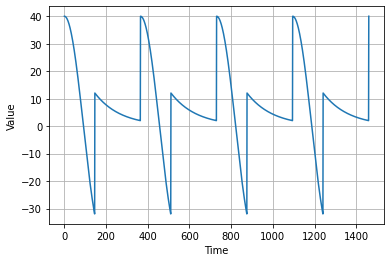

In [15]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plot_series(time, series)
plt.show()

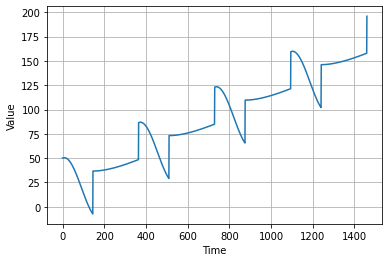

In [16]:
series = 10 + trend(time,0.1)+seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

In [0]:
def white_noise(time, noise_level=1, seed=None):
  #seed เป็น true จะเเรนดอมติดลบได้
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

array([ 2.48357077, -0.69132151,  3.23844269, ...,  6.44876377,
        3.36590676, -0.69227992])

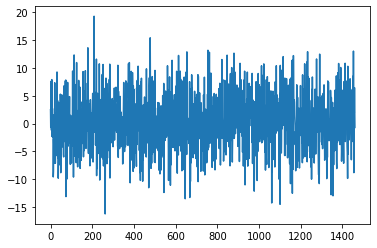

In [33]:
noise = white_noise(time,5,42)
plt.plot(time,noise)
noise

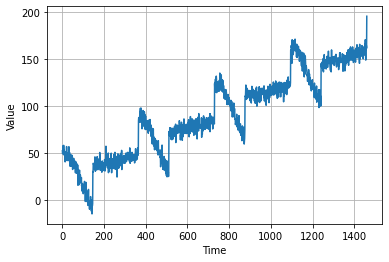

In [34]:
series = 10 + trend(time,0.1)+seasonality(time, period=365, amplitude=amplitude)+ noise
plot_series(time,series)